In [2]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

Using TensorFlow backend.


In [3]:
## Plot ad hoc mnist instances
from keras.datasets import mnist
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print(X_train.shape)

(60000, 28, 28)


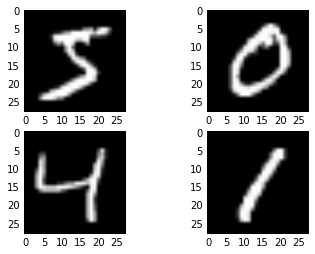

In [5]:
# plot 4 images as gray scale
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [6]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [7]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [8]:
print(X_train.shape)

(60000, 784)


In [9]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [10]:
print(y_train.shape)
print(y_train[0])
print(y_train[1])

(60000,)
5
0


In [11]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [12]:
print(y_train.shape)
print(y_train[0])
print(y_train[1])

(60000, 10)
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [13]:
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [14]:
# build the model
model = baseline_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
2s - loss: 0.2781 - acc: 0.9212 - val_loss: 0.1412 - val_acc: 0.9571
Epoch 2/10
1s - loss: 0.1117 - acc: 0.9676 - val_loss: 0.0922 - val_acc: 0.9710
Epoch 3/10
1s - loss: 0.0719 - acc: 0.9796 - val_loss: 0.0791 - val_acc: 0.9768
Epoch 4/10
1s - loss: 0.0508 - acc: 0.9855 - val_loss: 0.0753 - val_acc: 0.9769
Epoch 5/10
1s - loss: 0.0377 - acc: 0.9892 - val_loss: 0.0680 - val_acc: 0.9789
Epoch 6/10
1s - loss: 0.0268 - acc: 0.9928 - val_loss: 0.0642 - val_acc: 0.9799
Epoch 7/10
1s - loss: 0.0210 - acc: 0.9947 - val_loss: 0.0629 - val_acc: 0.9807
Epoch 8/10
1s - loss: 0.0140 - acc: 0.9970 - val_loss: 0.0631 - val_acc: 0.9803
Epoch 9/10
1s - loss: 0.0110 - acc: 0.9978 - val_loss: 0.0593 - val_acc: 0.9806
Epoch 10/10
1s - loss: 0.0081 - acc: 0.9983 - val_loss: 0.0587 - val_acc: 0.9813


In [16]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 1.87%
